In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Intialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

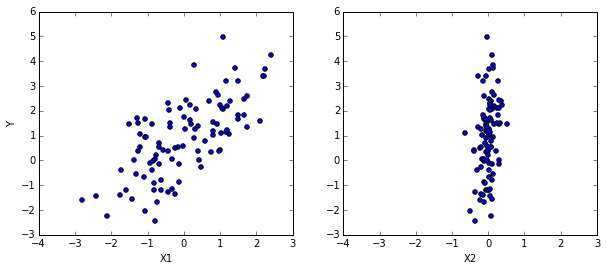

In [2]:
%matplotlib inline 

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

In [3]:
from pymc3 import Model, Normal, HalfNormal

Couldn't import dot_parser, loading of dot files will not be possible.


Using gpu device 0: GeForce GT 750M (CNMeM is disabled)


In [4]:
basic_model = Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = Normal('alpha', mu=0, sd=10)
    beta = Normal('beta', mu=0, sd=10, shape=2)
    sigma = HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2

    # Likelihood (sampling distribution) of observations
    Y_obs = Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [5]:
from pymc3 import find_MAP

map_estimate = find_MAP(model=basic_model)

print(map_estimate)

{'alpha': array(0.9065985757590524), 'beta': array([ 0.94848596,  2.60705517]), 'sigma_log': array(-0.03278147323479117)}


In [7]:
from pymc3 import NUTS, sample
from scipy import optimize

with basic_model:

    # obtain starting values via MAP
    start = find_MAP(fmin=optimize.fmin_powell)

    # draw 2000 posterior samples
    trace = sample(2000, start=start) 

Assigned NUTS to alpha
Assigned NUTS to beta
Assigned NUTS to sigma_log
 [-----------------100%-----------------] 2000 of 2000 complete in 1.8 sec

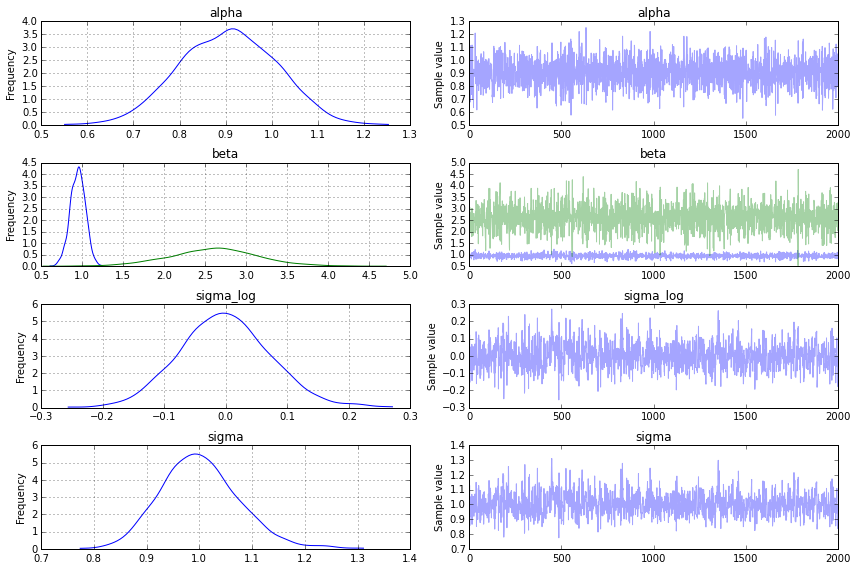

In [8]:
from pymc3 import traceplot

traceplot(trace);